<a href="https://colab.research.google.com/github/prakharrathi25/MNIST-Image-Recognition/blob/master/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Image Recognition using Keras

### Importing necessary libraries

In [0]:
# Data Manipulation library
import numpy as np 
import pandas as pd

# Data visualisation libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

# Image Manipulation 
import cv2 as cv

# Evaluation and Splitting 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Deep Learning Libraries
import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, Lambda, MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


In [0]:
# Uploading Data 
from google.colab import files 
files.upload() 

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
# Loading Data 
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Make original data copies 
train_og = train_data.copy() 
test_og = test_data.copy() 
print(train_data.shape, test_data.shape)

(42000, 785) (28000, 784)


In [0]:
# Sample of the data 
print(train_data.head())
print(test_data.head())

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]


In [0]:
# Extract only the features 
X = train_data.drop(['label'], axis = 1).values
y = train_data['label'].values
test_X = test_data.values

In [0]:
# Grayscale Normalization 
X = X / 255.0
test_X = test_X / 255.0

In [0]:
# Reshape the image data into 3 dimensions (height = 28pixels, width = 28px, 1)
# because 28 x 28 = 784 
X = X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

### Encoding

In [0]:
# One hot encode the labels. There are 10 labels so we add 10 new dimensions
y = to_categorical(y)
print(y.shape)

(42000, 10)


In [0]:
# Train and validation splits 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=324)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(31500, 28, 28, 1) (31500, 10) (10500, 28, 28, 1) (10500, 10)


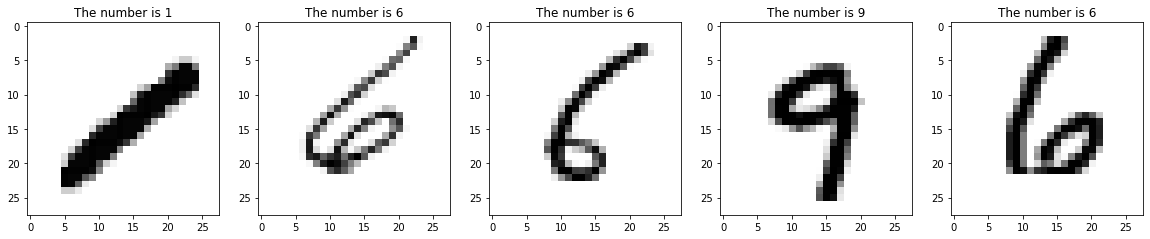

In [0]:
# Visulaisation of the data 
images = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(images[i], cmap = 'binary')
    digit = y_train[i].argmax()   # finding the number where the array has a 1 which will be the max value
    ax.set(title = f"The number is {digit}")

## Building the CNN

In [0]:
# Important parameters
epochs = 50
batch_size = 64

In [0]:
# Building the CNN Model
model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPoolinglayer

#model.add(Conv2D(filters=128, kernel_size = (3,3), activation='relu'))
model.add(Dropout(0.1))
# model.add(MaxPooling2D(pool_size=(2,2)))    
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
# model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
#model.add(BatchNormalization())
#model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

### Data Augmentation

In [0]:
# Using to prevent overfitting 

datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False,
                             rotation_range=10, 
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)

#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_val, y_val, batch_size=batch_size)

In [0]:
# Model training 
model.fit(X, y, batch_size=batch_size, validation_split=0.2, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33600 samples, validate on 8400 samples
Epoch 1/10





33600/33600 [==============================] - 208s 6ms/step - loss: 0.2400 - acc: 0.9226 - val_loss: 0.0648 - val_acc: 0.9796
Epoch 2/10
33600/33600 [==============================] - 208s 6ms/step - loss: 0.0742 - acc: 0.9776 - val_loss: 0.0732 - val_acc: 0.9774
Epoch 3/10
33600/33600 [==============================] - 209s 6ms/step - loss: 0.0534 - acc: 0.9832 - val_loss: 0.0702 - val_acc: 0.9820
Epoch 4/10
33600/33600 [==============================] - 207s 6ms/step - loss: 0.0382 - acc: 0.9881 - val_loss: 0.0510 - val_acc: 0.9857
Epoch 5/10
33600/33600 [==============================] - 207s 6ms/step - loss: 0.0353 - acc: 0.9890 - val_loss: 0.0538 - val_acc: 0.9860
Epoch 6/10
33600/33600 [==============================] - 203s 6ms/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0639 - val_acc: 0.9810
Epoch 7/10
33600/3360

In [0]:
# Prediction 
y_pred = model.predict(X_val) # Predict encoded label as integers between 0-9

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_val, 1) # Decode labels
acc_score = accuracy_score(y_true = Y_test, y_pred = Y_pred)
print(acc_score)

0.9897142857142858


In [0]:
# Printing Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 256)        

In [0]:
# Fit the model 
model_history = model.fit_generator(train_gen,
                                    epochs = epochs,
                                    steps_per_epoch = X_train.shape[0] // batch_size,
                                    validation_data = test_gen,
                                    validation_steps = X_val.shape[0] // batch_size)

Epoch 1/50
492/492 [==============================] - 203s 413ms/step - loss: 0.1172 - acc: 0.9662 - val_loss: 0.0870 - val_acc: 0.9762
Epoch 2/50
492/492 [==============================] - 200s 407ms/step - loss: 0.0751 - acc: 0.9783 - val_loss: 0.0713 - val_acc: 0.9797
Epoch 3/50
492/492 [==============================] - 202s 410ms/step - loss: 0.0648 - acc: 0.9810 - val_loss: 0.0545 - val_acc: 0.9857
Epoch 4/50
492/492 [==============================] - 201s 408ms/step - loss: 0.0571 - acc: 0.9834 - val_loss: 0.0562 - val_acc: 0.9847
Epoch 5/50
492/492 [==============================] - 201s 408ms/step - loss: 0.0555 - acc: 0.9829 - val_loss: 0.0651 - val_acc: 0.9805
Epoch 6/50
492/492 [==============================] - 201s 408ms/step - loss: 0.0496 - acc: 0.9848 - val_loss: 0.0567 - val_acc: 0.9848
Epoch 7/50
492/492 [==============================] - 202s 410ms/step - loss: 0.0461 - acc: 0.9871 - val_loss: 0.0545 - val_acc: 0.9854
Epoch 8/50
492/492 [============================

In [0]:
# Prediction 
y_pred = model.predict(X_val) # Predict encoded label as integers between 0-9

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_val, 1) # Decode labels
acc_score = accuracy_score(y_true = Y_test, y_pred = Y_pred)
print(acc_score)

0.9926666666666667


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 256)        

## Low Parameter Model 

In [0]:
# Create model
model3 = Sequential(
#   Conv2D(8, (7,7),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
#   MaxPooling2D(5, 5),
#   Flatten(),
#   Dense(10, activation='softmax')
)
model3.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu', input_shape=(28,28,1)))
model3.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu'))
model3.add(Dropout(0.1))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(10, activation='softmax'))
# Compile and summarize
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 8)         584       
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 8)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                11530     
Total params: 12,194
Trainable params: 12,194
Non-trainable params: 0
_________________________________________________

In [0]:
# Train the model
x1 = train_og.drop(labels = ["label"],axis = 1) 
x1=x1.values.reshape(-1, 28, 28, 1)
x1 = x1 / 255.0
y1 = train_og['label']
model3.fit(x1, y1, epochs=30)

Epoch 1/30
42000/42000 [==============================] - 28s 656us/step - loss: 0.2703 - acc: 0.9196
Epoch 2/30
42000/42000 [==============================] - 27s 640us/step - loss: 0.1086 - acc: 0.9670
Epoch 3/30
42000/42000 [==============================] - 27s 641us/step - loss: 0.0845 - acc: 0.9751
Epoch 4/30
42000/42000 [==============================] - 27s 634us/step - loss: 0.0673 - acc: 0.9794
Epoch 5/30
42000/42000 [==============================] - 26s 628us/step - loss: 0.0566 - acc: 0.9823
Epoch 6/30
42000/42000 [==============================] - 26s 631us/step - loss: 0.0468 - acc: 0.9856
Epoch 7/30
42000/42000 [==============================] - 27s 631us/step - loss: 0.0414 - acc: 0.9875
Epoch 8/30
42000/42000 [==============================] - 26s 624us/step - loss: 0.0363 - acc: 0.9886
Epoch 9/30
42000/42000 [==============================] - 26s 626us/step - loss: 0.0330 - acc: 0.9891
Epoch 10/30
42000/42000 [==============================] - 26s 624us/step - loss: 

In [0]:
# Prediction 
y_pred = model3.predict(X_val) # Predict encoded label as integers between 0-9

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_val, 1) # Decode labels
acc_score = accuracy_score(y_true = Y_test, y_pred = Y_pred)
print(acc_score)

0.9990476190476191


In [0]:
# Prediction 
y_pred = model.predict(X_val)
X_val__ = X_val.reshape(X_val.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_val__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_val[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [0]:
pred = model.predict_classes(test_X, verbose = 1)